In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [380]:
# https://www.kaggle.com/code/sinhasatwik/simple-salary-analysis

df = pd.read_csv("./Salary_Data.csv")

df.sample(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1784,41.0,Male,Master's Degree,Software Engineer Manager,13.0,170000.0
6184,24.0,Female,High School,Receptionist,0.0,25000.0
4689,25.0,Male,High School,Junior Sales Associate,1.0,30000.0
3070,48.0,Female,Master's Degree,Senior Software Engineer,23.0,185038.0
24,41.0,Male,Master's,Financial Manager,13.0,140000.0
2429,49.0,Female,High School,Senior Project Engineer,25.0,154207.0
2221,30.0,Male,Bachelor's Degree,Back end Developer,5.0,100000.0
3740,39.0,Female,Master's Degree,Marketing Manager,10.0,110000.0
5061,28.0,Female,PhD,Director of Marketing,6.0,105000.0
6289,43.0,Female,Bachelor's Degree,Content Marketing Manager,12.0,120000.0


# Data Preparation

In [381]:
df.shape

(6704, 6)

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


Missing Value Handle
---


In [383]:
# เช็คว่ามี Missing Value ไหม
df.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [384]:
df.dropna(inplace=True) #นำข้อมูลที่มี Missing value ออก

In [385]:
df.isnull().sum() #Missing Value หายไปแล้ว

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

Drop Dupliicates
----

In [386]:
#แสดงให้ดูว่ามีข้อมูลซ้ำ
df[df.duplicated()].sort_values(by='Age')

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
5109,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
5122,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
4910,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
4975,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
5031,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
...,...,...,...,...,...,...
2476,60.0,Female,PhD,Software Engineer Manager,33.0,179180.0
1277,61.0,Male,PhD,Software Engineer Manager,20.0,200000.0
1258,62.0,Male,PhD,Software Engineer Manager,19.0,200000.0
1305,62.0,Male,PhD,Software Engineer Manager,19.0,200000.0


In [387]:
df.drop_duplicates(inplace=True)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6623,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0
6624,27.0,Male,High School,Sales Manager,2.0,40000.0
6625,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0
6628,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0


In [388]:
df.duplicated().sum()

0

In [389]:
df.shape

(1787, 6)

Outlier Detect
----


<Axes: >

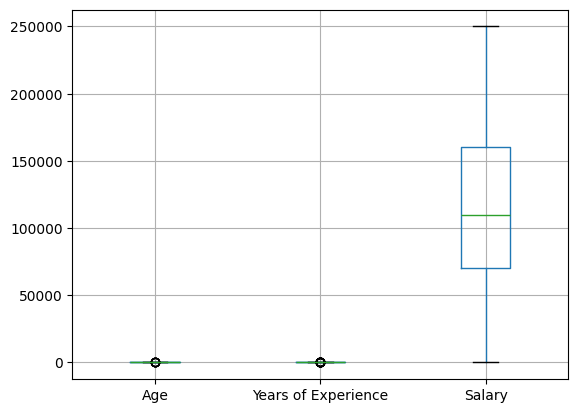

In [390]:
df.boxplot()
# สังเกตุว่ามี Outlier ที่ Age และ Years of Experience

In [391]:
for i in ["Age", "Years of Experience"]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
    print(i," : ",outlier.index)

    # Drop Outlier
    df.drop(index=outlier.index,inplace=True)

Age  :  Index([1211, 1225, 1236, 1260, 2396, 2421], dtype='int64')
Years of Experience  :  Index([2378, 2387, 2401, 2435, 2541, 2543, 2554, 2557, 2574, 2600, 2607, 2632,
       2643, 2787, 2800, 2803, 2820, 2846, 2871, 3104],
      dtype='int64')


<Axes: >

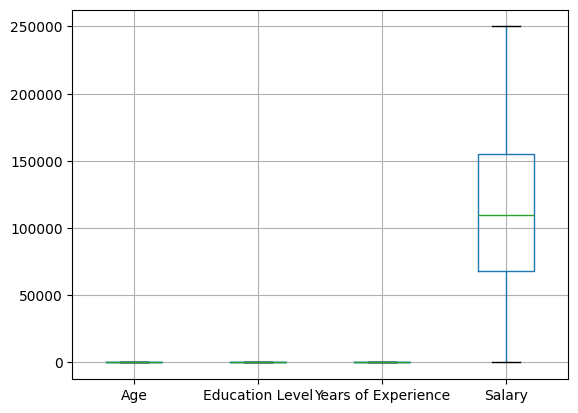

In [410]:
df.boxplot()

Convert
----

In [393]:
df["Age"] = df["Age"].astype(int)
df["Years of Experience"] = df["Years of Experience"].astype(int)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5,90000.0
1,28,Female,Master's,Data Analyst,3,65000.0
2,45,Male,PhD,Senior Manager,15,150000.0
3,36,Female,Bachelor's,Sales Associate,7,60000.0
4,52,Male,Master's,Director,20,200000.0
...,...,...,...,...,...,...
6623,43,Female,Master's Degree,Digital Marketing Manager,15,150000.0
6624,27,Male,High School,Sales Manager,2,40000.0
6625,33,Female,Bachelor's Degree,Director of Marketing,8,80000.0
6628,37,Male,Bachelor's Degree,Sales Director,7,90000.0


In [394]:
# ตรวจสอบว่ามีเพศอะไรบ้าง
df["Gender"].value_counts().reset_index()

,Gender,count
0,Male,957
1,Female,800
2,Other,4


In [395]:
# ตรวจสอบ ตำแหน่งงาน
df["Job Title"].value_counts().reset_index()

,Job Title,count
0,Full Stack Engineer,120
1,Software Engineer Manager,111
2,Senior Project Engineer,92
3,Senior Software Engineer,91
4,Back end Developer,81
...,...,...
186,Financial Advisor,1
187,Junior Designer,1
188,Chief Technology Officer,1
189,Technical Recruiter,1


In [396]:
# ตรวจสอบ ระดับการศึกษา
df["Education Level"].value_counts().reset_index()

,Education Level,count
0,Bachelor's Degree,503
1,Master's Degree,443
2,PhD,323
3,Bachelor's,262
4,Master's,122
5,High School,107
6,phD,1


In [397]:
# จะเห็นว่า ความหมายของคำเหมือนกัน แค่เขียนต่างกัน
# Master's Degree == Master's
# PhD == phD
# Bachelor's Degree == Bachelor's


# รวมระดับการศึกษาที่มีความหมายเหมือนกัน เข้าด้วยกัน
df.replace("phD", "PhD", inplace=True)
df.replace("Master's", "Master's Degree", inplace=True)
df.replace("Bachelor's", "Bachelor's Degree", inplace=True)

In [398]:
# ตรวจสอบอีกครั้ง
df["Education Level"].value_counts().reset_index()

,Education Level,count
0,Bachelor's Degree,765
1,Master's Degree,565
2,PhD,324
3,High School,107


In [399]:
# เปลี่ยน ระดับการศึกษาให้เป็นตัวเลข เพื่อให้ง่ายต่อการวิเคราะห์
# High School --> 1
# Bachelor's Degree	--> 2
# Master's Degree	--> 3
# PhD	--> 4

df["Education Level"] = df["Education Level"].replace(
    {"High School": 1, "Bachelor's Degree": 2, "Master's Degree": 3, "PhD": 4}
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1761 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1761 non-null   int32  
 1   Gender               1761 non-null   object 
 2   Education Level      1761 non-null   int64  
 3   Job Title            1761 non-null   object 
 4   Years of Experience  1761 non-null   int32  
 5   Salary               1761 non-null   float64
dtypes: float64(1), int32(2), int64(1), object(2)
memory usage: 82.5+ KB


#  EDA


In [400]:
df.describe()

,Age,Education Level,Years of Experience,Salary
count,1761.000000,1761.000000,1761.000000,1761.000000
mean,34.833049,2.628052,8.859739,112120.273140
std,7.864077,0.850593,6.434917,51180.245032
min,21.000000,1.000000,0.000000,350.000000
25%,29.000000,2.000000,3.000000,68000.000000
50%,33.000000,3.000000,8.000000,110000.000000
75%,41.000000,3.000000,13.000000,155000.000000
max,58.000000,4.000000,28.000000,250000.000000


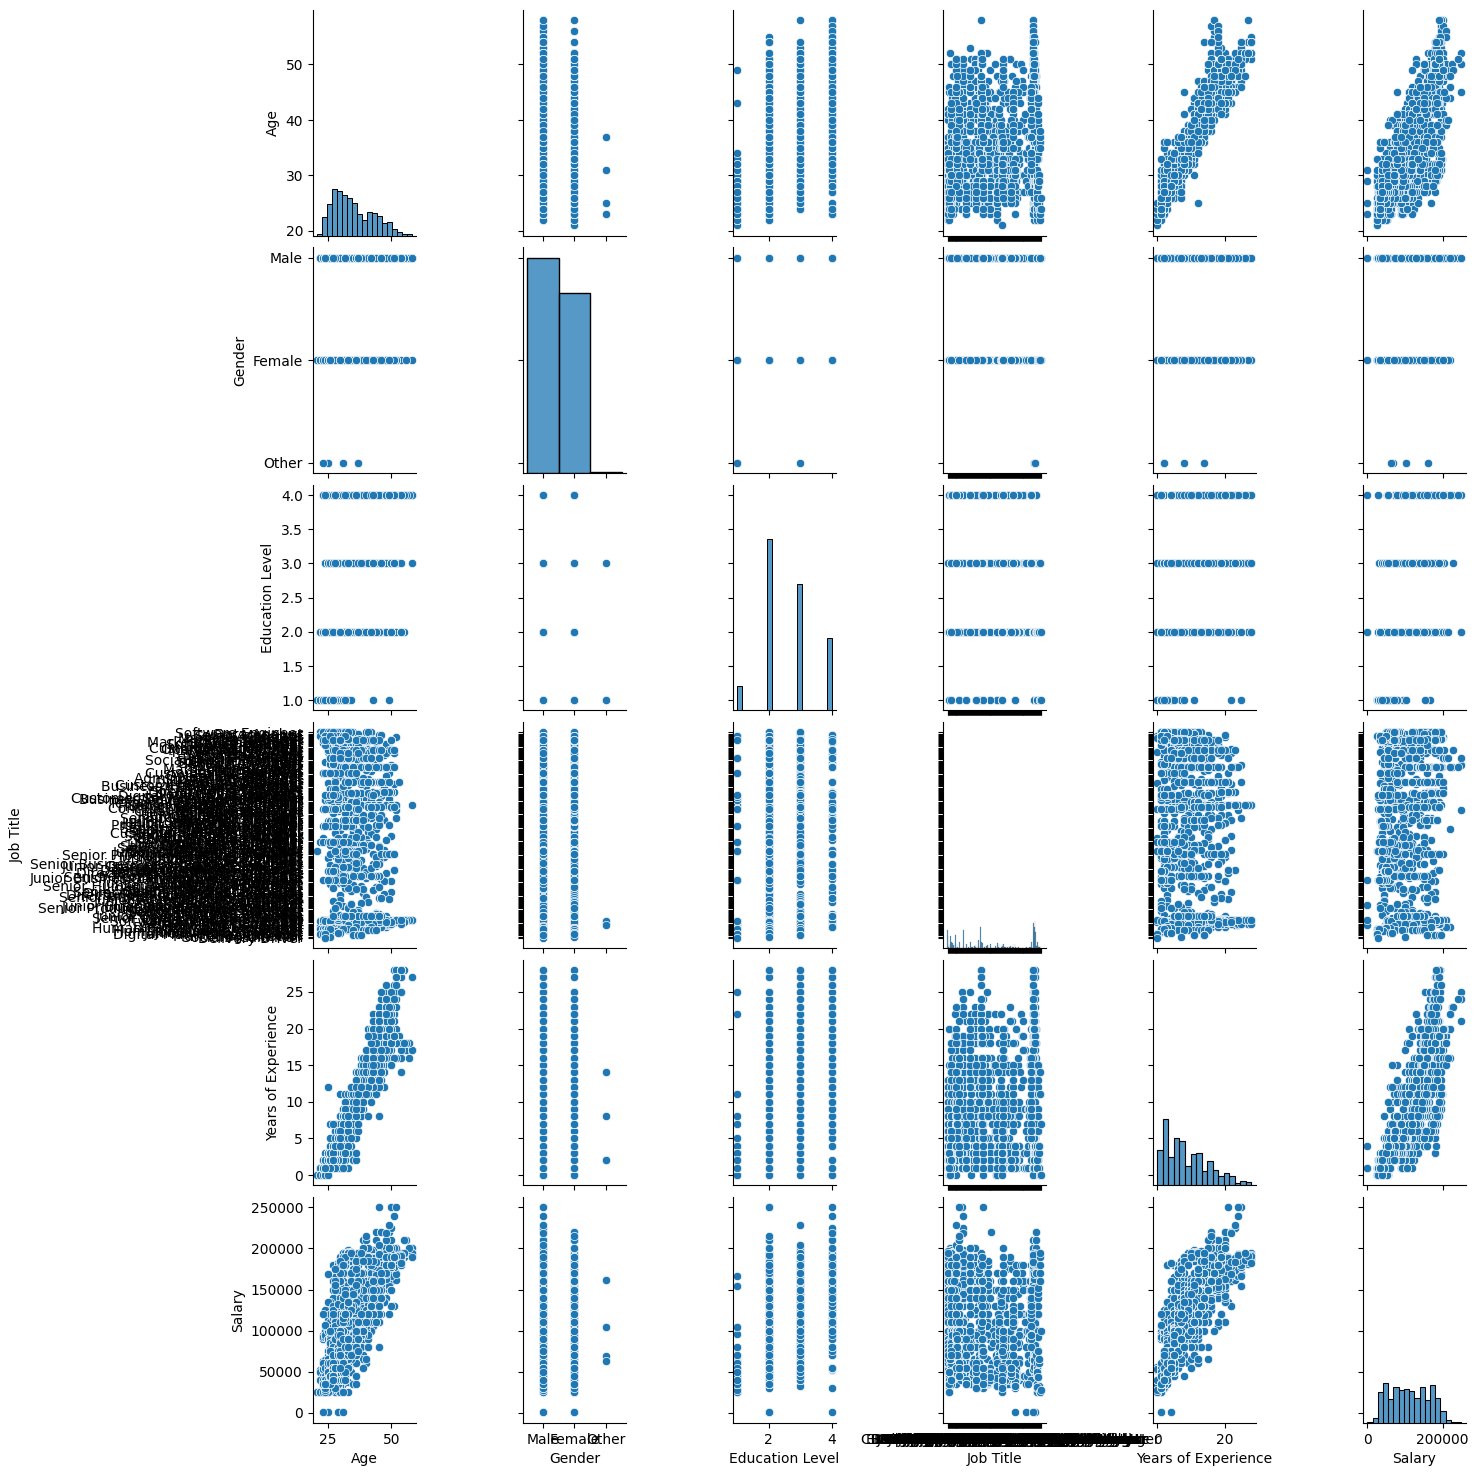

In [401]:
sns.pairplot(
    df,
    vars=[
        "Age",
        "Gender",
        "Education Level",
        "Job Title",
        "Years of Experience",
        "Salary",
    ],
)
plt.show()

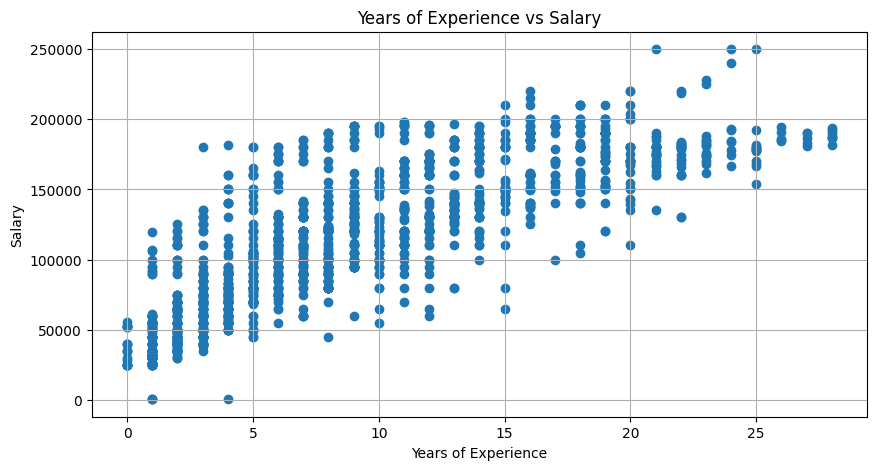

In [402]:
# plot กราฟ เงินเดืน - ประสบการทำงาน
plt.figure(figsize=(10, 5))
plt.scatter(df["Years of Experience"], df["Salary"])
plt.title("Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

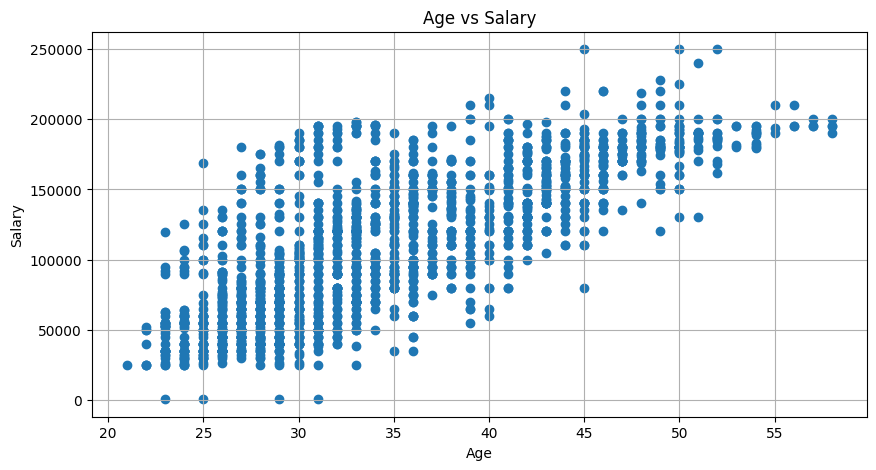

In [403]:
# plot กราฟ เงินเดืน - อายุ
plt.figure(figsize=(10, 5))
plt.scatter(df["Age"], df["Salary"])
plt.title("Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

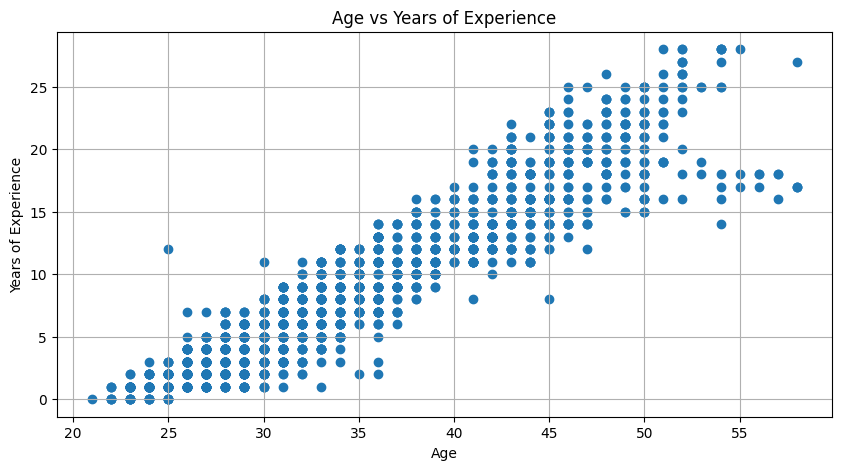

In [404]:
# plot กราฟ อายุ - ประสบการณ์
plt.figure(figsize=(10, 5))
plt.scatter(df["Age"], df["Years of Experience"])
plt.title("Age vs Years of Experience")
plt.xlabel("Age")
plt.ylabel("Years of Experience")
plt.grid(True)
plt.show()

In [405]:
# หา Correlation
df.corr(numeric_only=True)
# จะเห็นว่าค่า corr เป็นบวกแปลว่า มีความสัมพันในทิศทางเดียวกัน

,Age,Education Level,Years of Experience,Salary
Age,1.000000,0.521084,0.936007,0.763189
Education Level,0.521084,1.000000,0.522469,0.608948
Years of Experience,0.936007,0.522469,1.000000,0.827431
Salary,0.763189,0.608948,0.827431,1.000000


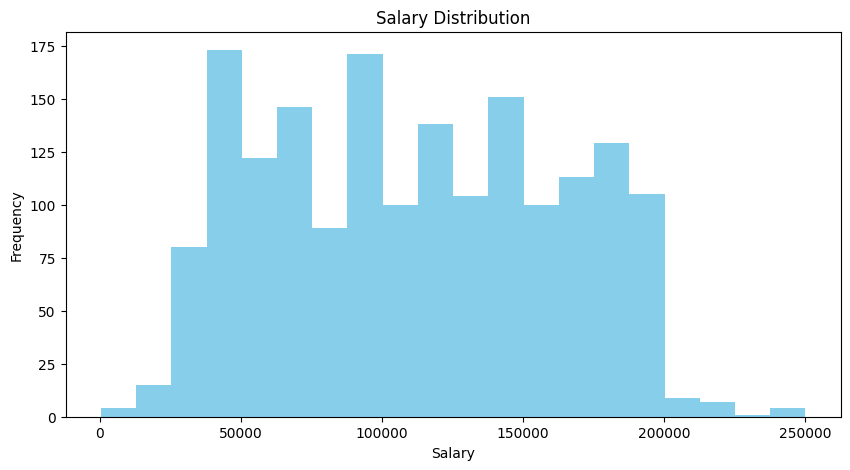

In [406]:
# Histogram ของเงินเดือน
plt.figure(figsize=(10, 5))
plt.hist(df["Salary"], bins=20, color="skyblue")
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

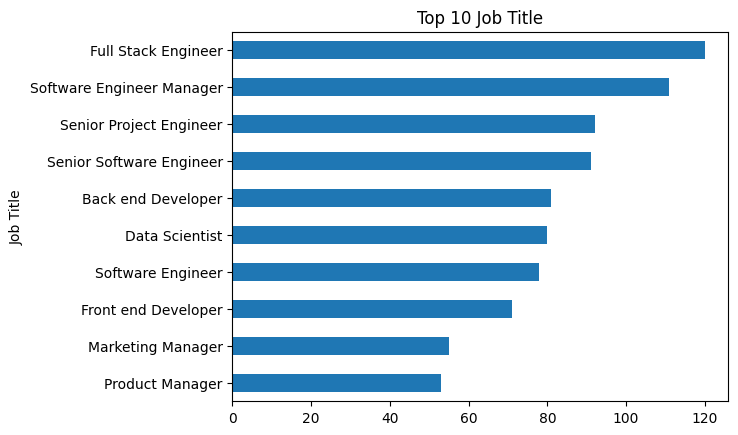

In [407]:
# Top 10 ของอาชีพที่มีจำนวนเยอะที่สุด
df["Job Title"].value_counts().head(10).plot(kind="barh", title="Top 10 Job Title").invert_yaxis()


Text(0.5, 1.0, 'Education level <--> Salary')

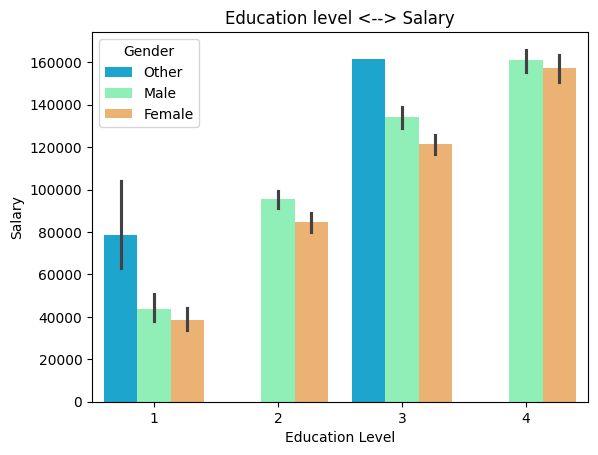

In [408]:
sns.barplot(
    x="Education Level",
    y="Salary",
    data=df,
    hue="Gender",
    palette='rainbow',
)
plt.title("Education level <--> Salary")

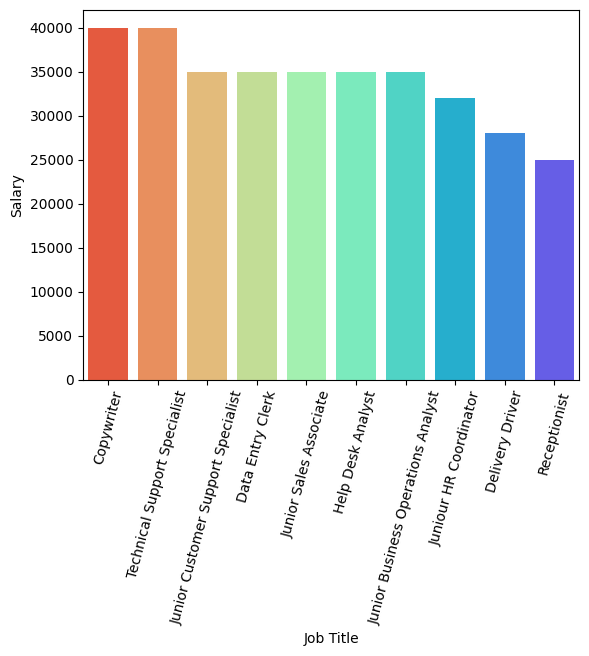

In [417]:
# เงินเดือนที่มากที่สุดของตำแหน่งงาน
job_max_salary = (
    df.groupby(by=["Job Title"])["Salary"]
    .max()
    .reset_index()
    .sort_values(by="Salary")
    .head(10)
)

sns.barplot(y="Salary", x="Job Title", data=job_max_salary,hue=job_max_salary['Job Title'],palette='rainbow').invert_xaxis()
plt.xticks(rotation=75)
plt.show()

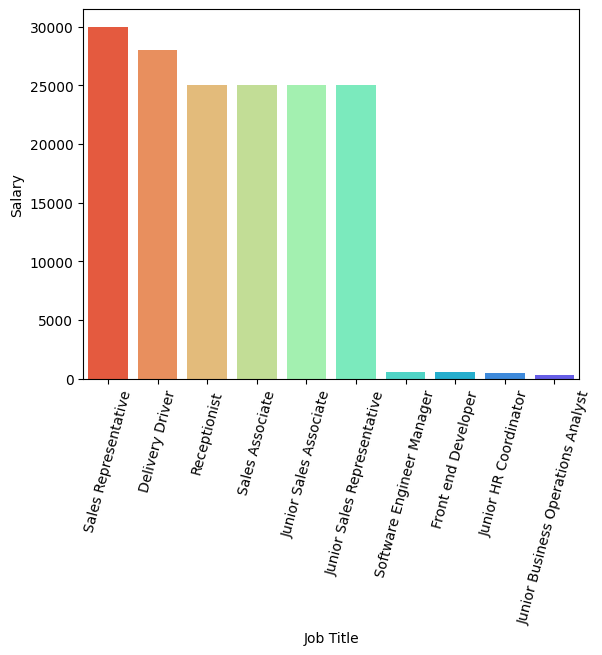

In [416]:
# เงินเดือนที่น้อยที่สุดของตำแหน่งงาน
job_min_salary = (
    df.groupby(by=["Job Title"])["Salary"]
    .min()
    .reset_index()
    .sort_values(by="Salary")
    .head(10)
)

sns.barplot(
    y="Salary",
    x="Job Title",
    data=job_min_salary,
    hue=job_min_salary["Job Title"],
    palette="rainbow",
).invert_xaxis()
plt.xticks(rotation=75)
plt.show()

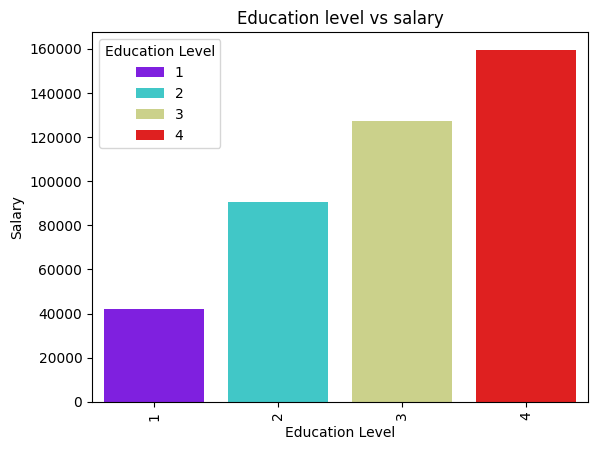

In [427]:
edusalary = df.groupby("Education Level")[["Salary"]].mean().reset_index()
sns.barplot(x="Education Level", y="Salary", data=edusalary,hue=edusalary['Education Level'],palette='rainbow')
plt.xticks(rotation=90)
plt.title("Education level vs salary")
plt.show()

# จะเห็นว่าหากระดับการศึกษาสูง จะมีเงินเดือนสูงขึ้น